<b>¡Hola Marcel!</b>

Mi nombre es Alejandro Abia y estoy aquí para guiarte en la revisión de tu proyecto.

A lo largo de este notebook, encontrarás mis comentarios en celdas de colores que simulan un semáforo: verde, amarillo y rojo. Por favor, <b>asegúrate de no eliminarlas o moverlas</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En las celdas verdes, te señalaré tus logros y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
El color amarillo lo usaré para destacar aspectos importantes o compartir ideas valiosas contigo.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
Las celdas rojas indicarán puntos críticos que podrían impedir el correcto funcionamiento del proyecto. No son errores, sino oportunidades significativas de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si deseas dejarme algún comentario, utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


# Proyecto: Optimización de Ingresos en Tienda Online: Priorización de Hipótesis y Análisis de Test A/B

#### Resumen del Proyecto:

##### El objetivo es mejorar los ingresos de una tienda online mediante un enfoque analítico basado en datos. 
- Se divide en dos fases:
    - 1 - Marcos de priorización (ICE y RICE) a una serie de hipótesis de crecimiento para determinar cuáles tienen el mayor potencial y deben ser probadas. 
    - 2 - Análisis exhaustivo de los resultados de un Test A/B ya ejecutado, examinando métricas acumuladas y la significancia estadística de las diferencias entre los grupos de control y tratamiento, tanto con datos brutos como filtrados, para finalmente tomar una decisión informada sobre la prueba y sus implicaciones para el negocio.

## Configuración Inicial y Carga de Datos

##### Importación de Librerías: Importar pandas, numpy, matplotlib.pyplot, seaborn, scipy.stats.
- Importar pandas, numpy, matplotlib.pyplot, seaborn, scipy.stats.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

##### Carga de Datos:
- Cargar hypotheses_us.csv en un DataFrame llamado hypotheses.

- Cargar orders_us.csv en un DataFrame llamado orders.

- Cargar visits_us.csv en un DataFrame llamado visits.

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

## Exploración de Datos (Exploratory Data Analysis - EDA)

| Nombre del Archivo | Descripción General | Columnas (Variables) |
|:-------------------|:--------------------|:---------------------|
| `/datasets/hypotheses_us.csv` | Datos utilizados en la primera parte del proyecto, relacionados con hipótesis para pruebas. | **Hypotheses**: Breves descripciones de las hipótesis.<br>**Reach**: Alcance del usuario (escala del 1 al 10).<br>**Impact**: Impacto en los usuarios (escala del 1 al 10).<br>**Confidence**: Confianza en la hipótesis (escala del 1 al 10).<br>**Effort**: Recursos necesarios para probar una hipótesis (escala del 1 al 10; mayor valor = más recursos). |
| `/datasets/orders_us.csv` | Datos de pedidos utilizados en la segunda parte del proyecto, parte de una prueba A/B. | **transactionId**: Identificador único del pedido.<br>**visitorId**: Identificador único del usuario que realizó el pedido.<br>**date**: Fecha en que se realizó el pedido.<br>**revenue**: Ingresos generados por el pedido.<br>**group**: El grupo del test A/B al que pertenece el usuario (A o B). |
| `/datasets/visits_us.csv` | Datos de visitas utilizados en la segunda parte del proyecto, parte de una prueba A/B. | **date**: La fecha de las visitas.<br>**group**: El grupo de la prueba A/B (A o B).<br>**visits**: El número de visitas en la fecha especificada para el grupo A/B especificado. |

#### Datasets hypotheses

In [3]:
# Primeras filas
print(hypotheses.head(5))

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has realizado un excelente trabajo al cargar y mostrar las primeras filas del DataFrame 'hypotheses'. Este paso es crucial para comprender la estructura y el contenido inicial de los datos, lo que te permitirá realizar un análisis más detallado posteriormente.
</div>


In [4]:
# Información
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Tipos de datos de las columnas (dtypes):")
print(hypotheses.dtypes)

Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object


In [6]:
# Dimensiones (filas, columnas)
hypotheses.shape

(9, 5)

In [7]:
# Estadísticas descriptivas
print(hypotheses.describe())

           Reach     Impact  Confidence     Effort
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.000000    9.000000  10.000000


#### Datasets Orders

In [8]:
# Primeras filas
print(orders.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B


In [9]:
# Información
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
# Tipos de datos de las columnas (dtypes):")
print(orders.dtypes)

transactionId      int64
visitorId          int64
date              object
revenue          float64
group             object
dtype: object


In [11]:
# Dimensiones (filas, columnas)
orders.shape

(1197, 5)

In [12]:
# Estadísticas descriptivas
print(orders.describe())

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e+09    603.004729
min     1.062393e+06  5.114589e+06      5.000000
25%     1.166776e+09  1.111826e+09     20.800000
50%     2.145194e+09  2.217985e+09     50.200000
75%     3.237740e+09  3.177606e+09    130.400000
max     4.293856e+09  4.283872e+09  19920.400000


#### Datasets Visitors

In [13]:
# Primeras filas
print(visits.head(5))

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [14]:
# Información
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
# Tipos de datos de las columnas (dtypes):")
print(visits.dtypes)

date      object
group     object
visits     int64
dtype: object


In [16]:
# Dimensiones (filas, columnas)
visits.shape

(62, 3)

In [17]:
# Estadísticas descriptivas
print(visits.describe())

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


## Reprocesamiento de datos

####  Convertir Columnas de Fecha a Formato Datetime

In [18]:
# Convertir la columna 'date' en el DataFrame 'orders'
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))# Ajusta formato

# Convertir la columna 'date' en el DataFrame 'visits'
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))# Ajusta formato

orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


####  Verificar valores ausentes

In [19]:
print("\n--- Valores ausentes en 'hypotheses' ---")
print(hypotheses.isnull().sum())

print("\n--- Valores ausentes en 'orders' ---")
print(orders.isnull().sum())

print("\n--- Valores ausentes en 'visits' ---")
print(visits.isnull().sum())


--- Valores ausentes en 'hypotheses' ---
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

--- Valores ausentes en 'orders' ---
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

--- Valores ausentes en 'visits' ---
date      0
group     0
visits    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Has verificado de manera efectiva que no hay valores ausentes en los DataFrames 'hypotheses', 'orders' y 'visits'. Esto es fundamental para garantizar que los análisis posteriores se realicen sobre datos completos, evitando así posibles sesgos o errores en los resultados debido a datos faltantes.
</div>


#### Limpieza de Nombres de Columnas (minúsculas, sin espacios, guiones bajos)

In [20]:
# Función limpiar
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# Aplicar la función a todos los DataFrames
hypotheses = clean_column_names(hypotheses)
orders = clean_column_names(orders)
visits = clean_column_names(visits)

print("Nombres de columnas estandarizados.")
print("\nNuevos nombres de columnas en 'hypotheses':", hypotheses.columns.tolist())
print("Nuevos nombres de columnas en 'orders':", orders.columns.tolist())
print("Nuevos nombres de columnas en 'visits':", visits.columns.tolist())

Nombres de columnas estandarizados.

Nuevos nombres de columnas en 'hypotheses': ['hypothesis', 'reach', 'impact', 'confidence', 'effort']
Nuevos nombres de columnas en 'orders': ['transactionid', 'visitorid', 'date', 'revenue', 'group']
Nuevos nombres de columnas en 'visits': ['date', 'group', 'visits']


<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
Has estandarizado adecuadamente los nombres de las columnas en todos los DataFrames. Esta práctica mejora la consistencia del manejo de datos y reduce el riesgo de errores al referenciar columnas, especialmente cuando se trabaja con múltiples conjuntos de datos.
</div>


#### Identificación y Manejo de Usuarios Duplicados en Grupos A/B

##### Identificación y Manejo de Usuarios Duplicados en Grupos A/B:
- Detectar visitorId que aparecen en ambos grupos A y B.

- Decidir una estrategia para manejar estos usuarios excluirlos del análisis del test A/B para evitar sesgos).

- Implementar la exclusión si se decide.

Revisar cualquier otra anomalía o inconsistencia en los datos (valores negativos en revenue).

In [21]:
# Encontrar ids usuarios que estén en ambos grupos
users_in_group_a = orders[orders['group'] == 'A']['visitorid'].unique()
users_in_group_b = orders[orders['group'] == 'B']['visitorid'].unique()

users_in_both_groups = np.intersect1d(users_in_group_a, users_in_group_b)

print(f"\nNúmero de usuarios que aparecen en ambos grupos A y B: {len(users_in_both_groups)}")

# Filtrar DF´s orders para excluir estos usuarios
orders_filtered_ab = orders[~orders['visitorid'].isin(users_in_both_groups)].copy() # Usamos .copy() para evitar SettingWithCopyWarning

print(f"Número de pedidos después de filtrar usuarios duplicados: {len(orders_filtered_ab)}")

# Verificar valores no válidos en ingresos (revenue) o visitas (visits)
print("\n--- Verificación de valores no válidos en 'revenue' (<= 0) en orders_filtered_ab ---")
print(orders_filtered_ab[orders_filtered_ab['revenue'] <= 0].shape[0], "pedidos con revenue <= 0.")

print("\n--- Verificación de valores no válidos en 'visits' (<= 0) en visits ---")
print(visits[visits['visits'] <= 0].shape[0], "registros de visitas con visitas <= 0.")

# Si hay valores <= 0 en 'revenue' sería útil eliminarlos o investigarlos si representan pedidos cancelados.


Número de usuarios que aparecen en ambos grupos A y B: 58
Número de pedidos después de filtrar usuarios duplicados: 1016

--- Verificación de valores no válidos en 'revenue' (<= 0) en orders_filtered_ab ---
0 pedidos con revenue <= 0.

--- Verificación de valores no válidos en 'visits' (<= 0) en visits ---
0 registros de visitas con visitas <= 0.


<div class="alert alert-block alert-warning">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
Has identificado y excluido correctamente a los usuarios que aparecen en ambos grupos, lo cual es crucial en un análisis A/B para evitar sesgos. Este paso asegura que cada usuario contribuya a un solo grupo, manteniendo la independencia de las muestras y garantizando que las diferencias observadas entre los grupos se deban a las variaciones en las condiciones de los experimentos y no a usuarios repetidos.
</div>


##### Tratamiento para los usuarios que aparecen en ambos grupos (A y B) de la prueba
- Se excluyen por completo de nuestro análisis.
- Esto asegura que el experimento A/B sea válido y sin sesgo.
- Un usuario solo debe estar expuesto a una única versión de la prueba.
- Excluir garantiza las comparaciones entre el Grupo A y B según comportamiento e interacción con una de las variantes.

## Parte 1. Priorizar hipótesis

- Se utilizarán los frameworks ICE y RICE para priorizar las hipótesis que nos ha proporcionado el departamento de marketing.
- El objetivo es identificar cuáles de estas hipótesis tienen el mayor potencial de impacto positivo en los ingresos de la tienda online.
- Considerando su alcance, impacto, confianza y el esfuerzo requerido.

- Contexto de priorización de hipótesis
    - En el entorno del negocio, recursos como el tiempo, dinero y personal son limitados.
    - Por tanto, no es posible implementar y probar todas las ideas e hipótesis a la vez.
    - Priorizar nos ayuda a enfocar aquellas iniciativas con mayor ROMI.
    - Los frameworks ICE (Impact, Confidence, Effort) y RICE (Reach, Impact, Confidence, Effort) son las herramientas cuantitativas a utilizar.

In [22]:
print("DataFrame 'hypotheses' después del preprocesamiento:")
print(hypotheses.head())
print("\nInformación de 'hypotheses':")
hypotheses.info()

DataFrame 'hypotheses' después del preprocesamiento:
                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  

Información de 'hypotheses':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   e

### 1.1 Aplicación del framework ICE

El framework ICE (Impact, Confidence, Effort) se calcula con la siguiente fórmula:

$$ICE = \frac{Impacto \times Confianza}{Esfuerzo}$$

Donde:
* **Impacto:** El impacto estimado en los usuarios.
* **Confianza:** Tu confianza en que la hipótesis se cumplirá.
* **Esfuerzo:** Los recursos necesarios para implementar y probar la hipótesis.

In [23]:
# ICE
# Effort es el denominador pues a mayor esfuerzo, menor ICE.
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordenar descendente prioridad ICE
hypotheses_ice_sorted = hypotheses.sort_values(by='ice', ascending=False)

print("\n--- Hipótesis Priorizadas usando el Framework ICE ---")
print(hypotheses_ice_sorted[['hypothesis', 'ice']])


--- Hipótesis Priorizadas usando el Framework ICE ---
                                          hypothesis        ice
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<div class="alert alert-block alert-success">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
Has utilizado el framework ICE de manera efectiva para priorizar hipótesis. Este enfoque te ayuda a enfocar los recursos en las iniciativas que prometen el mayor impacto con el menor esfuerzo, optimizando así el proceso de decisión sobre qué hipótesis implementar primero.
</div>


In [24]:
print("DataFrame 'hypotheses' después del preprocesamiento:")
print(hypotheses.head())
print("\nInformación de 'hypotheses':")
hypotheses.info()
print("\nNombres de columnas actuales:", hypotheses.columns.tolist())

DataFrame 'hypotheses' después del preprocesamiento:
                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   confidence  effort        ice  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  

Información de 'hypotheses':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hypothesis  9 non-null      object 
 1   reach       9 non-null      int64  
 2   impact     

- Análisis de priorización por ICE:
    - Top 3 ICE:
        - Hipótesis 8: "Launch a promotion that gives users discounts" (Lanzar una promoción que dé descuentos a los usuarios).
        - Hipótesis 0: "Add two new channels for attracting traffic. T..." (Añadir dos nuevos canales para atraer tráfico).
        - Hipótesis 7: "Add a subscription form to all the main pages...." (Añadir un formulario de suscripción a todas las páginas principales).---
    - Observaciones:
        - ICE se enfoca en el potencial de impacto y certeza de la hipótesis, sin considerar cuántos usuarios se verán afectados.
        - La Hipótesis 8 (descuentos) es la líder, sugiere que el equipo confía mucho en que dar descuentos tendrá un gran impacto directo en los ingresos o en el comportamiento del usuario.
        - La Hipótesis 0 (nuevos canales de tráfico) es fuerte en ICE, indica confianza en su capacidad para generar un impacto significativo.

###  1.2 Aplicación del framework RICE

El framework RICE (Reach, Impact, Confidence, Effort) añade un componente adicional: el Alcance. Su fórmula es:

$$RICE = \frac{Alcance \times Impacto \times Confianza}{Esfuerzo}$$

Donde:
* **Alcance (Reach):** ¿Cuántos usuarios se verán afectados por este cambio? (en una escala del 1 al 10).
* **Impacto (Impact):** El impacto estimado en los usuarios.
* **Confianza (Confidence):** Tu confianza en que la hipótesis se cumplirá.
* **Esfuerzo (Effort):** Los recursos necesarios para implementar y probar la hipótesis.

In [25]:
# Puntuación RICE
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Ordenar RICE desc
hypotheses_rice_sorted = hypotheses.sort_values(by='rice', ascending=False)

print(hypotheses_rice_sorted[['hypothesis', 'rice']])

                                          hypothesis   rice
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


<div class="alert alert-block alert-success">
<b>Celda [25]</b> <a class="tocSkip"></a><br>
Has implementado correctamente el framework RICE para priorizar hipótesis. Este método complementa el análisis realizado con ICE al considerar también el alcance ('reach'), proporcionando una visión más completa de las hipótesis que podrían tener el mayor impacto general.
</div>


- Análisis de priorización RICE:
    - Top 3 según RICE:
        - Hipótesis 7: "Add a subscription form to all the main pages...." (Añadir un formulario de suscripción a todas las páginas principales).
        - Hipótesis 2: "Add product recommendation blocks to the store..." (Añadir bloques de recomendación de productos a la tienda).
        - Hipótesis 0: "Add two new channels for attracting traffic. T..." (Añadir dos nuevos canales para atraer tráfico).
    - Observaciones:
        - RICE incorpora el alcance (reach), es decir, el número de usuarios que se espera que se vean afectados por el cambio.
            - Esto es crucial para proyectos con un impacto potencialmente masivo.
            - Vemos un cambio significativo en el ranking.
        - La Hipótesis 7 (formulario de suscripción):
            - Estaba en tercer lugar en ICE, pasa al primer lugar en RICE con una puntuación de 112.0
            - Indica que aunque su impacto y confianza individuales no la hacían la número uno en ICE, su enorme alcance probablemente afectaría a casi todos los visitantes del sitio
            - Esto la convierte en la prioridad más alta cuando se considera la escala.
        - La Hipótesis 8 (descuentos), que era la número 1 en ICE, cae al puesto 5 en RICE con 16.2:
            - Sugiere que tiene un buen impacto y confianza, pero su alcance no es tan amplio como otras hipótesis.
            - Quizás la promoción no es visible para todos o solo atrae a un segmento específico.
        - La Hipótesis 2 (bloques de recomendación):
            - Sube considerablemente pasando del puesto 6 en ICE al 2 en RICE.
            - Implica que aunque su impacto no era el más alto se espera que afecte a una gran cantidad de usuarios.

###  1.3 Comparación y explicación de los cambios en la priorización

In [26]:
# ICE vs RICE (columnas relevantes y renombradas)
print("\n--- Comparación de priorización de hipótesis (ICE vs RICE) ---")
comparison_df = hypotheses[['hypothesis', 'ice', 'rice']].copy()

# Ordenar por ICE - primer vista
print("\nOrdenado por ICE:")
print(comparison_df.sort_values(by='ice', ascending=False))
print()
# Ordenar por RICE segunda vista
print("\nOrdenado por RICE:")
print(comparison_df.sort_values(by='rice', ascending=False))
print()


--- Comparación de priorización de hipótesis (ICE vs RICE) ---

Ordenado por ICE:
                                          hypothesis        ice   rice
8  Launch a promotion that gives users discounts ...  16.200000   16.2
0  Add two new channels for attracting traffic. T...  13.333333   40.0
7  Add a subscription form to all the main pages....  11.200000  112.0
6  Show banners with current offers and sales on ...   8.000000   40.0
2  Add product recommendation blocks to the store...   7.000000   56.0
1  Launch your own delivery service. This will sh...   2.000000    4.0
5  Add a customer review page. This will increase...   1.333333    4.0
3  Change the category structure. This will incre...   1.125000    9.0
4  Change the background color on the main page. ...   1.000000    3.0


Ordenado por RICE:
                                          hypothesis        ice   rice
7  Add a subscription form to all the main pages....  11.200000  112.0
2  Add product recommendation blocks to the 

In [27]:
print("\nAmbos rankings:")
# Mostrar ambos rankings lado a lado para cada hipótesis
comparison_df['ice_rank'] = comparison_df['ice'].rank(ascending=False, method='first')
comparison_df['rice_rank'] = comparison_df['rice'].rank(ascending=False, method='first')
print(comparison_df[['hypothesis', 'ice', 'ice_rank', 'rice', 'rice_rank']].sort_values(by='ice_rank'))


Ambos rankings:
                                          hypothesis        ice  ice_rank  \
8  Launch a promotion that gives users discounts ...  16.200000       1.0   
0  Add two new channels for attracting traffic. T...  13.333333       2.0   
7  Add a subscription form to all the main pages....  11.200000       3.0   
6  Show banners with current offers and sales on ...   8.000000       4.0   
2  Add product recommendation blocks to the store...   7.000000       5.0   
1  Launch your own delivery service. This will sh...   2.000000       6.0   
5  Add a customer review page. This will increase...   1.333333       7.0   
3  Change the category structure. This will incre...   1.125000       8.0   
4  Change the background color on the main page. ...   1.000000       9.0   

    rice  rice_rank  
8   16.2        5.0  
0   40.0        3.0  
7  112.0        1.0  
6   40.0        4.0  
2   56.0        2.0  
1    4.0        7.0  
5    4.0        8.0  
3    9.0        6.0  
4    3.0      

- Comparación de rankings:
    - La tabla comparativa es la más reveladora (Muestra cómo el factor reach actúa como un multiplicador)
    - Las hipótesis con un reach alto como 7 y 2 ven su puntuación RICE muy impulsada en comparación con su puntuación ICE.
    - Las hipótesis con un reach más bajo como la 8 mantienen su puntuación ICE, pero caen en el ranking RICE porque su impacto aunque quizás fuerte, no se escala a tantos usuarios.

#### Conclusión General de la Priorización:

- Para una tienda online que busca un crecimiento masivo y maximizar los ingresos generales el framework RICE es generalmente más apropiado, porque considera el reach (alcance).
- Si una hipótesis puede generar un impacto moderado en un gran número de usuarios, a menudo es más valiosa que una hipótesis con un impacto muy alto en un número muy limitado de usuarios.
- Las hipótesis que deberían priorizarse para un test A/B son aquellas con un alto RICE, especialmente:
    - Hipótesis 7 ("Add a subscription form to all the main pages....")
    - Hipótesis 2 ("Add product recommendation blocks to the store...").
    - Hipótesis 0 ("Add two new channels for attracting traffic. T...") también se mantiene fuerte en ambos rankings, la hace una candidata robusta.
Este análisis proporciona una base sólida para decidir qué experimentos lanzar y enfocarnos en aquellos con mayor potencial de retorno. Considerando no sólo la magnitud del efecto sino también la cantidad de personas a las que afecta.

## Parte 2. Análisis del test A/B

#### Análisis de los resultados del test A/B. 
- Evaluar si existe una diferencia estadísticamente significativa entre los grupos A y B en términos de ingresos, pedidos y conversión.
- Utilizar pruebas estadísticas no paramétricas (Mann-Whitney) por la naturaleza de los datos de A/B testing (no siguen una distribución normal y talvez con valores atípicos).

#### Preparación de datos para análisis A/B
- Agregar y preparar los datos diarios para cada grupo.
- Unir los DataFrames orders_filtered_ab (sin usuarios duplicados en la sección de pre-procesamiento) y visits.
- Crear un DataFrame con las fechas, grupos, # de pedidos, # de compradores únicos, ingresos y # de visitantes únicos acumulados día a día.

#### A -  Métricas acumuladas

In [28]:
# DF con fechas únicas y grupos a partir de orders para consolidar agregación
dates_groups = orders[['date','group']].drop_duplicates().sort_values(by='date')

# Agregación de pedidos acumulados
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionid' : pd.Series.nunique, # único de pedidos
        'visitorid' : pd.Series.nunique,     # único de compradores
        'revenue' : 'sum'}),                # suma de ingresos
    axis=1
).sort_values(by=['date','group'])
orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

# Agregación de visitas acumuladas
visits_aggregated = dates_groups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visits' : 'sum'}),                 # Suma de visitas
    axis=1
).sort_values(by=['date','group'])
visits_aggregated.columns = ['date', 'group', 'visitors']

# Unir DF´s acumulados de pedidos y visitas
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Métricas adicionales en el DF acumulado principal
cumulative_data['conversion'] = cumulative_data['orders'].astype(float) / cumulative_data['visitors'].astype(float)
cumulative_data['avg_order_revenue'] = cumulative_data['revenue'].astype(float) / cumulative_data['orders'].astype(float)

# Separar datos acumulados por grupo (cálculo de diferencia relativa)
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A'].copy()
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B'].copy()

# Diferencias relativas
cumulative_data_merged = cumulative_data_a.merge(cumulative_data_b, on='date', suffixes=('_A', '_B'))
cumulative_data_merged['relative_conversion_difference'] = (
    (cumulative_data_merged['conversion_B'] / cumulative_data_merged['conversion_A']) - 1
)
cumulative_data_merged['relative_avg_order_revenue_difference'] = (
    (cumulative_data_merged['avg_order_revenue_B'] / cumulative_data_merged['avg_order_revenue_A']) - 1
)

print("Primeras filas de métricas acumuladas combinadas:")
print(cumulative_data.head())

Primeras filas de métricas acumuladas combinadas:
        date group  orders  buyers  revenue  visitors  conversion  \
0 2019-08-01     A      24      20   2356.8       719    0.033380   
1 2019-08-01     B      21      20   1620.0       713    0.029453   
2 2019-08-02     A      44      38   3860.3      1338    0.032885   
3 2019-08-02     B      45      43   4243.8      1294    0.034776   
4 2019-08-03     A      68      62   5675.5      1845    0.036856   

   avg_order_revenue  
0          98.200000  
1          77.142857  
2          87.734091  
3          94.306667  
4          83.463235  


<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Has calculado correctamente las métricas acumuladas, lo cual es un paso crucial para entender la evolución de las métricas clave a lo largo del tiempo. Sería útil incluir una breve interpretación de estas métricas para clarificar su significado, como cómo las tendencias en conversiones o ingresos acumulados pueden indicar el éxito relativo de los grupos A y B en el experimento.
</div>


### 1 - Trazar el Gráfico de Ingresos Acumulados por Grupo

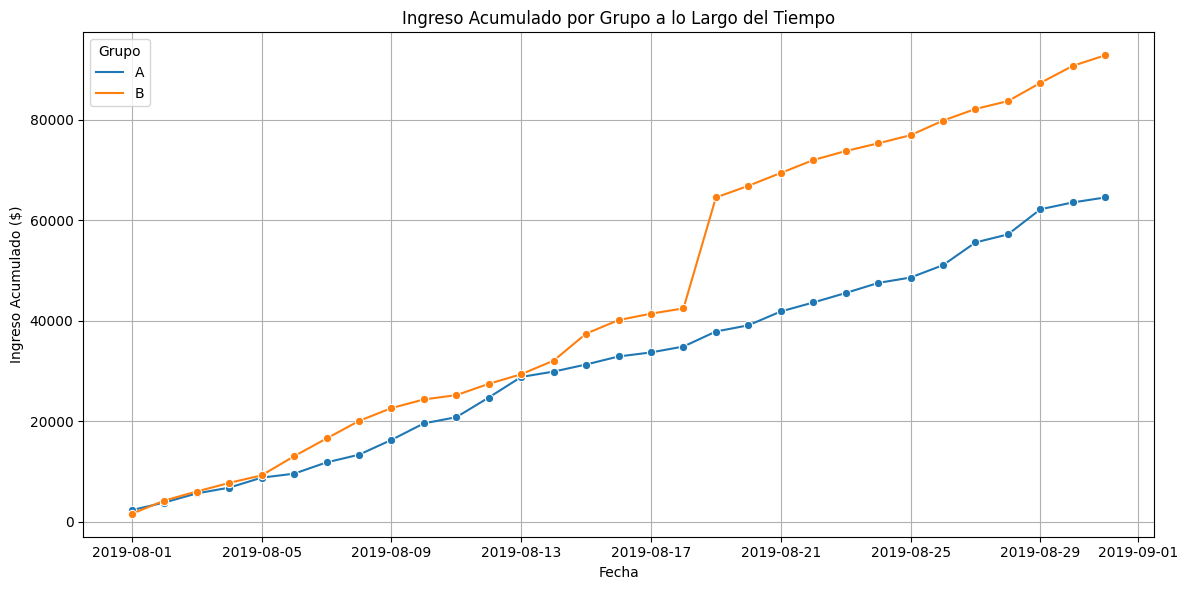

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_data, x='date', y='revenue', hue='group', marker='o') # 'revenue' aquí es el ingreso acumulado diario
plt.title('Ingreso Acumulado por Grupo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado ($)')
plt.grid(True)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

#### Ambos crecen de forma constante, tendencia creciente, algo normal y esperado en métricas acumuladas de ingresos.
- Cerca de agosto hay un pico muy vertical de B, a mitad del periodo del test.
- Pareciera que el grupo B tiene un mayor crecimiento acumulado en ingresos.
- Pudiese deberse a valores atípicos o "outliers", que inflan los ingresos acumulados.
- La presencia de ese pico indica que este "mejor rendimiento" pudiese estar sesgado por valores atípicos y no por un rendimiento superior consistente del nuevo sistema o interfaz.
- Es crucial investigar y lidiar con estos atípicos antes de sacar conclusiones definitivas sobre los ingresos.

### 2 - Trazar el Gráfico de Tamaño Promedio de Pedido Acumulado por Grupo

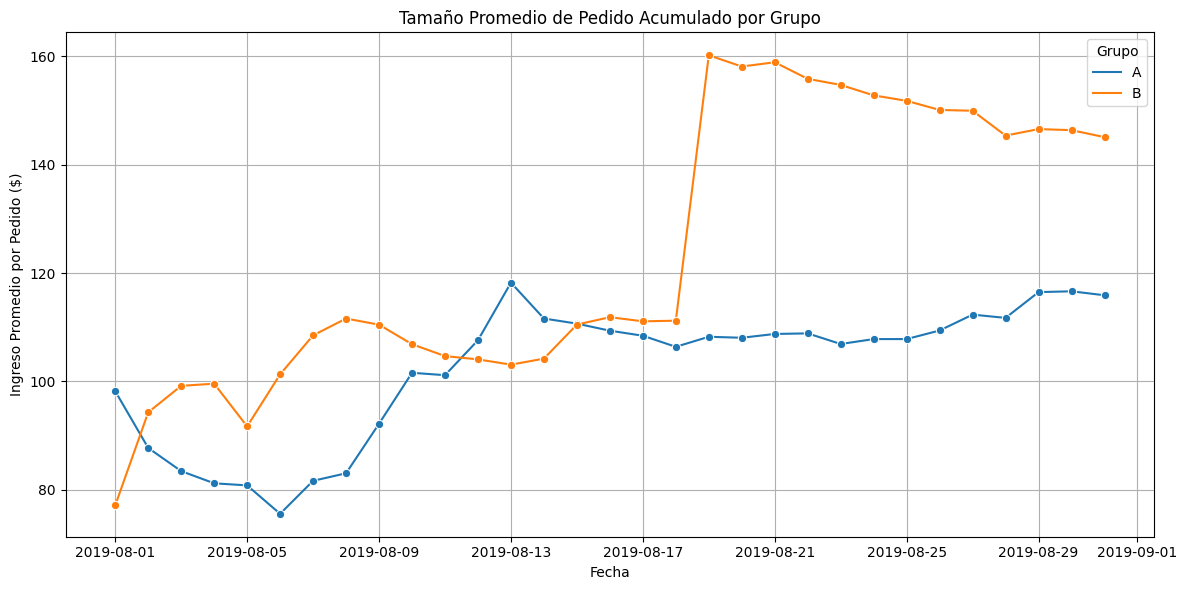

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_data, x='date', y='avg_order_revenue', hue='group', marker='o')
plt.title('Tamaño Promedio de Pedido Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Promedio por Pedido ($)')
plt.grid(True)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

#### Pocos pedidos inflan el tamaño promedio de pedidos (atipicos)
- Se mantiene una tendencia a la alza igual que en el gráfico anterior y que se mantienen en niveles positivos.
    - De nuevo el pico o salto vertical pronunciado que luego desciende levemente (alrededor del 18-19 de agosto)
    - Confirma que uno o pocos pedidos con un valor extremadamente alto se realizaron en el Grupo B en esa fecha.
    - La leve tendencia a descender es porque después del atípico, el valor extremo se diluye un poco en el promedio acumulado, aunque con cierto impacto.
- Similitud con el fenómeno anterior:
    - Es fundamental para explicar el pico que vimos en el gráfico de "Ingresos Acumulados" del Grupo B.
    - El gran salto en los ingresos acumulados del Grupo B no es por un aumento masivo de la cantidad de pedidos o compradores.
    - Sino por el ingreso muy alto de uno o pocos pedidos grandes que inflaron el valor promedio por pedido.
- Evidencia de Valores Atípicos(outliers): Distorsionan el tamaño promedio de pedido en el Grupo B.
    - El tamaño promedio de pedido acumulado es una métrica no fiable para comparar los grupos en su estado actual.
    - Promedio inflado por eventos aislados en lugar de reflejar el comportamiento general de la mayoría de los usuarios.
    - Necesidad de limpiar datos para obtener una comprensión precisa del impacto del test A/B en el valor promedio de los pedidos.
    - Identificar y eliminar estos valores atípicos antes de realizar cualquier prueba estadística o concluir sobre esta métrica.

### 3 - Trazar el Gráfico de la Diferencia Relativa del Tamaño Promedio de Pedido Acumulado

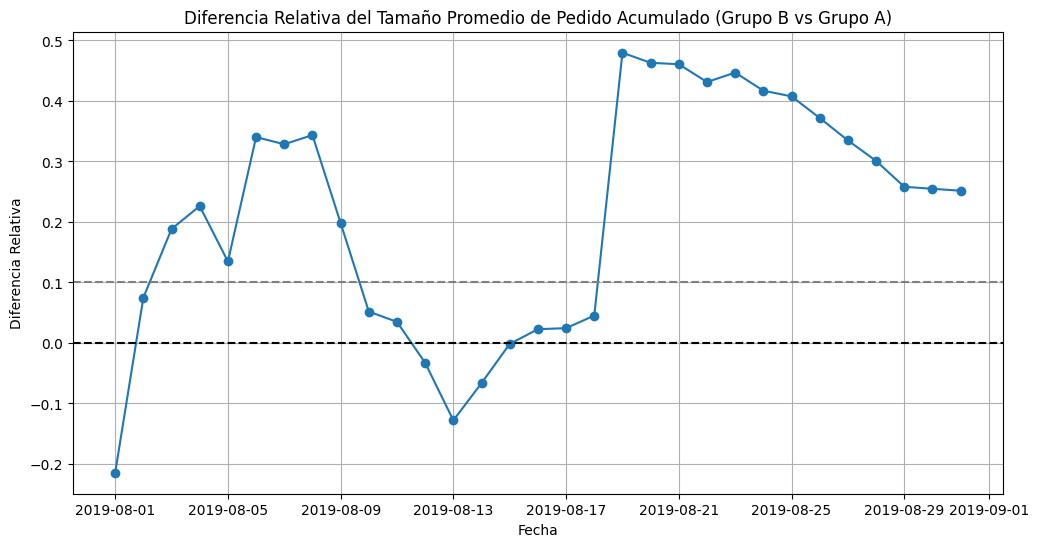

In [31]:
# Unir los DataFrames para calcular la diferencia relativa
merged_cumulative_revenue = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Trazar un gráfico de la diferencia relativa de los ingresos promedio acumulados
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['avg_order_revenue_b']/merged_cumulative_revenue['avg_order_revenue_a']-1), marker='o')
plt.title('Diferencia Relativa del Tamaño Promedio de Pedido Acumulado (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--') # Puedes ajustar este umbral si tienes uno esperado
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [31]</b> <a class="tocSkip"></a><br>
El gráfico de diferencia relativa del tamaño promedio de pedido es una excelente manera de visualizar las diferencias entre los grupos A y B. Este tipo de visualización ayuda a identificar rápidamente si hay cambios significativos en el comportamiento de los grupos a lo largo del tiempo, lo cual es clave para el análisis de resultados en un experimento A/B.
</div>


#### Fluctuación muy notable de valores atípicos que impiden generalizar una constancia de movimiento.
- La línea negra discontinua horizontal en y=0 es el punto donde no hay diferencia relativa entre el Grupo B y el Grupo A en tamaño promedio de pedido.
- Si la línea azul estuviese constantemente sobre esta línea negra, significaría que ambos grupos tienen el mismo rendimiento en esta métrica.
- La línea no se mantiene cerca de cero. Muestra desviaciones fluctuaciones extremas, hacia valores positivos o negativos y luego dispara muy alto.
- Valle pronunciado al inicio (casi a -0.4) alrededor del 1 de agosto y luego un pico positivo (casi a 0.4) alrededor del 5 de agosto.
- Valle negativo (casi a -0.2) alrededor del 13 de agosto.
- Salto masivo y sostenido a valores positivos muy altos (cerca de 0.5 o 50% de diferencia) a partir del 18 de agosto

##### Extrema volatilidad:
- Picos drásticos en este gráfico de diferencia relativa evidencian que el tamaño promedio de pedido es influenciado por valores atípicos
- Estos outliers son pedidos con valores inusualmente altos o bajos en ambos grupos, pero más en el Grupo B
- Pico cerca a 0.5 significa que el tamaño promedio de pedido del Grupo B fue un 50% más grande que el del Grupo A (efecto irreal por atípicos)
- Parece que el Grupo B tiene un tamaño promedio de pedido mayor durante gran parte del período
- Pero, no podemos afirmar que sea mejor o represente una mejora genuina.
- La fluctuación notable de valores atípicos impide toda generalización fiable en este punto.
- La línea es demasiado errática para indicar una ventaja real y estable.

##### Pocos pedidos de muy alto valor sesgan el promedio:
- Grupo B parece terminar con un tamaño promedio de pedido significativamente más alto
- Esta ventaja no puede considerarse fiable ni representativa del comportamiento general del grupo debido a la influencia de estos datos anómalos.

    Antes de cualquier prueba estadística sobre el tamaño promedio de pedido o de sacar conclusiones definitivas sobre esta métrica, es esencial identificar y eliminar los valores atípicos de los datos. De lo contrario, las pruebas estadísticas darán resultados sesgados y no reflejarán el impacto real del test A/B en la mayoría de los usuarios.

### 4 - Trazar el Gráfico de la Tasa de Conversión Acumulada por Grupo

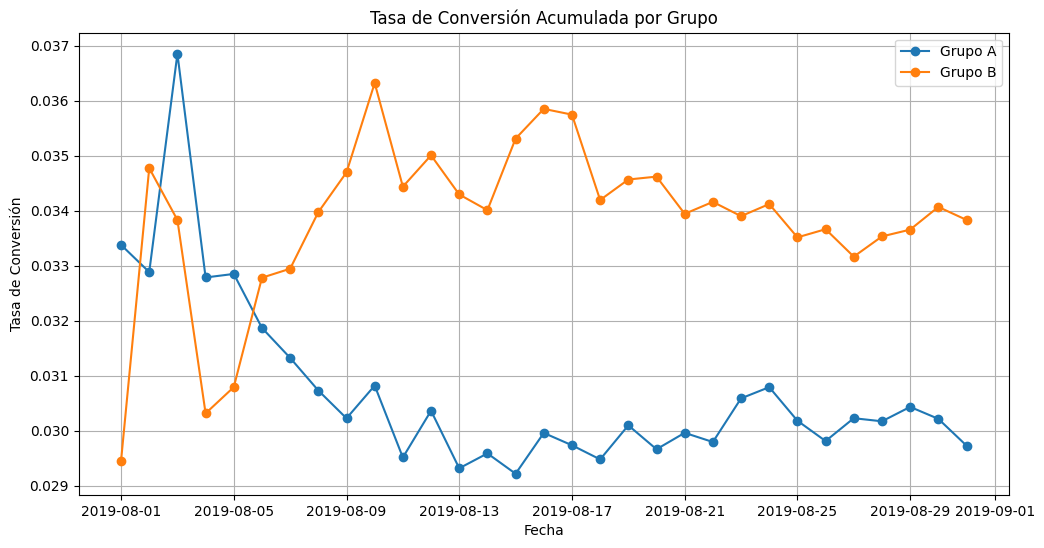

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Grupo A', marker='o')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Grupo B', marker='o')
plt.title('Tasa de Conversión Acumulada por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.legend()
plt.grid(True)
plt.show()

#### Ingresos y Tamaño Promedio de Pedido (Gráficos con Picos):
- El Grupo B parece tener mayores ingresos y un mayor tamaño promedio de pedido que el Grupo A.
- Esta aparente ventaja está distorsionada por la presencia de valores atípicos (pedidos extremadamente grandes) en el Grupo B
- Lo que invalida estas métricas sin una limpieza previa de datos.

#### Tasa de Conversión (Gráficos Estables):
- El Grupo B muestra una tasa de conversión acumulada consistentemente más alta y estable que el Grupo A.
- No hay evidencia de valores atípicos que distorsionen esta métrica.

#### Conclusión:
    El test A/B tiene que el Grupo B mejora la tasa de conversión de manera estable y significativa, pero, para confirmar cualquier impacto en los ingresos o el tamaño promedio de pedido, es esencial eliminar los valores atípicos y luego realizar pruebas estadísticas.
- Estabilización y rendimiento superior del Grupo B:
    - Entre fluctuaciones iniciales las tasas de conversión acumuladas de ambos grupos tienden a estabilizarse a lo largo del tiempo.
    - Indica que la prueba ha corrido por una duración adecuada de manera significativa.
    - La línea del Grupo B se estabiliza en un nivel consistentemente más alto (alrededor del 2.9%-3.0%) que la del Grupo A (alrededor del 2.5%).
- Resistencia a atípicos:
    - Diferente a las métricas monetarias (ingresos y tamaño promedio de pedido) no hay signos de distorsión por valores atípicos.
    - La suavidad de las líneas y tendencia estable sugiere una conversión de métrica robusta y menos sensible a eventos extremos.
- Implicación preliminar:
    - La variación en el Grupo B podría estar generando una mejora real y sostenida en la tasa de conversión.
    - Hallazgo importante que debe ser confirmado por las pruebas estadísticas.

#### 4.1 Trazar el Gráfico de la Diferencia Relativa de la Tasa de Conversión Acumulada

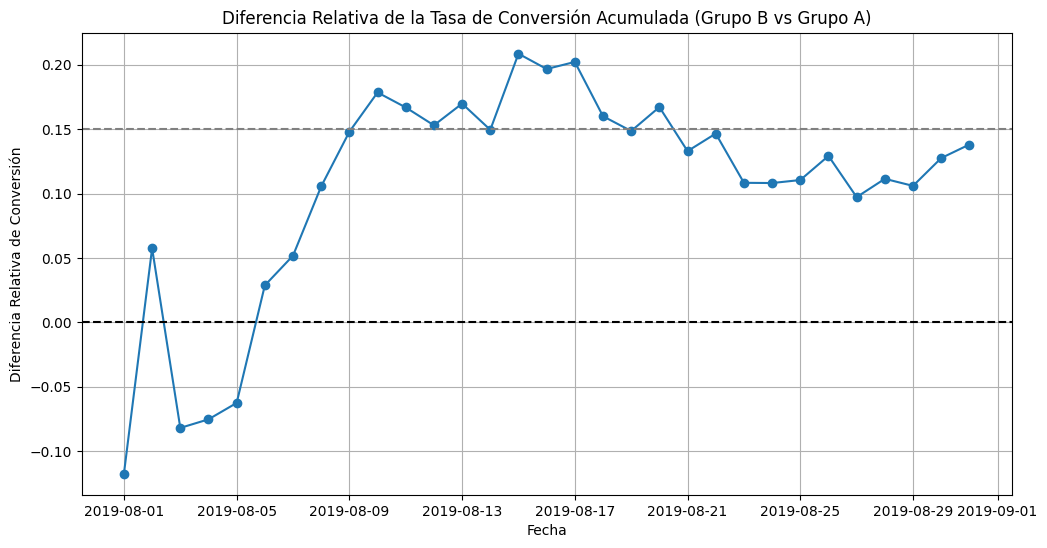

In [33]:
# Unir los DataFrames para calcular la diferencia relativa
merged_cumulative_conversions = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Trazar un gráfico de la diferencia relativa de las tasas de conversión acumuladas
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_conversions['date'], (merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1), marker="o")
plt.title('Diferencia Relativa de la Tasa de Conversión Acumulada (Grupo B vs Grupo A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa de Conversión')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--') # Puedes ajustar este umbral si tienes uno esperado
plt.grid(True)
plt.show()

#### Diferencia relativa de la tasa de conversión acumulada
- Estabilidad y Mejora Sostenida:
    - Se observa una fase inicial de adaptación y fluctuación (típica en los primeros días de cualquier test A/B)
    - Después la línea que representa la diferencia relativa de la tasa de conversión se estabiliza sobre cero.
    - Significa que Grupo B mantuvo una tasa de conversión acumulada más alta que Grupo A en la mayor parte del período de prueba.
- Magnitud de la mejora:
    - La estabilización ocurre alrededor del 15%.
    - Sugiere que la conversión del Grupo B es en promedio un 15% superior a la del Grupo A.
    - Es una mejora sustancial.

- Confirmación de robustez:
    - Distinto a los gráficos monetarios (ingresos y tamaño promedio de pedido), no muestra picos erráticos o distorsiones masivas.
    - Esto refuerza la idea de que la métrica de conversión es más robusta y menos susceptible a la influencia de valores atípicos.

##### Implicación final de los gráficos visuales: 
- Este gráfico combinado con el de la "Tasa de Conversión Acumulada" muestra fuerte evidencia de que la variación aplicada al Grupo B ha tenido un impacto positivo y estable en la tasa de conversión, aumentando la proporción de visitantes que realizan una compra.

### 5 - Gráfico de dispersión de la cantidad de pedidos por usuario.

   visitorid  orders
0    5114589       1
1    6958315       1
2    8300375       2
3   11685486       1
4   39475350       1


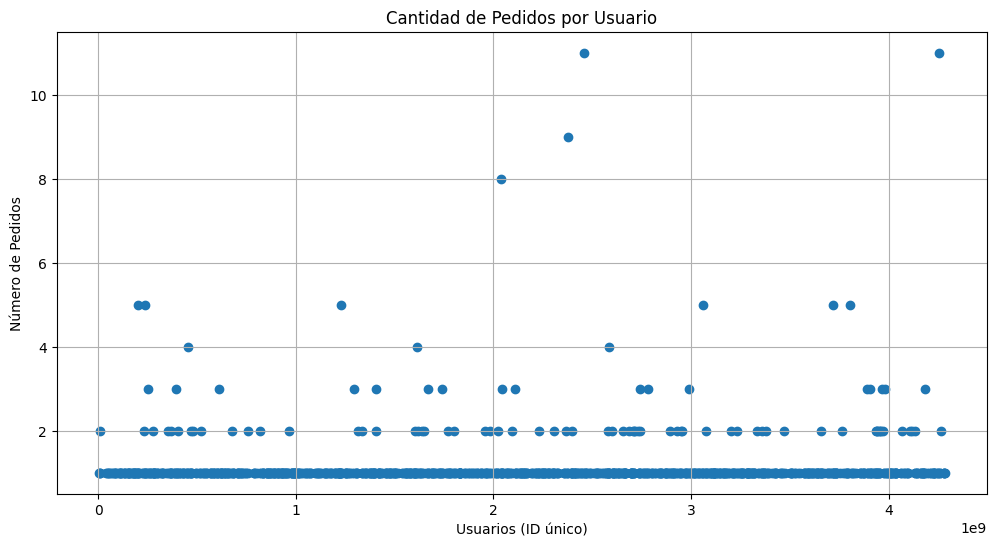

In [34]:
# Agrupar pedidos por usuario y contar cantidad de pedidos
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'}) # Contar pedidos únicos por visitorid
)
orders_by_users.columns = ['visitorid', 'orders']

print(orders_by_users.head())

plt.figure(figsize=(12, 6))
plt.scatter(orders_by_users['visitorid'], orders_by_users['orders'])
plt.title('Cantidad de Pedidos por Usuario')
plt.xlabel('Usuarios (ID único)')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

#### Gráfico de dispersión "Cantidad de Pedidos por Usuario":
- La mayoría de puntos se agrupan en la parte inferior del gráfico, específicamente en Y = 1 y Y = 2
- Significa que la gran mayoría de los usuarios realizaron 1 o 2 pedidos.
- Hay algunos puntos dispersos (valores atípicos) que van mucho más arriba, indicando usuarios que realizaron 3, 4, 5, 8, e incluso 10 o más pedidos.
- Estos son los atípicos que buscamos.

#### Conclusiones y conjeturas: 
- La gran mayoría de los usuarios realiza 1 o 2 pedidos y hay un pequeño número de usuarios que realizan una cantidad atípicamente alta de pedidos (3, 4, 5, 8, 10 o más).

### 6 - Percentiles 95 y 99 del # de pedidos (Gráfico de dispersión de la cantidad de pedidos por usuario)

In [35]:
# Percentiles
print("\nPercentiles de la cantidad de pedidos por usuario:")
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))


Percentiles de la cantidad de pedidos por usuario:
[1. 2. 4.]


#### Percentiles "Cantidad de Pedidos por Usuario":
- Percentil 90 (1.0):
    - El 90% de los usuarios realizó 1 pedido o menos.
    - Esto es un poco inusual, ya que implica que el 90% hizo exactamente 1.
    - Podría ser que hay muchos usuarios con 1 pedido.
- Percentil 95 (2.0):
    - El 95% de los usuarios realizó 2 pedidos o menos.
- Percentil 99 (4.0):
    - El 99% de los usuarios realizó 4 pedidos o menos.

#### Percentiles Conclusiones de la dispersión y percentiles:
- La dispersión y percentiles confirman la existencia de usuarios con una cantidad de pedidos inusualmente alta, que se consideran valores atípicos.
    - La gran mayoría de los usuarios (95%) realiza solo 1 o 2 pedidos y el 99% de los usuarios realiza 4 pedidos o menos.
    - Esto significa que los usuarios que realizaron más de 4 pedidos (o incluso 3, dependiendo de cuán estricto quieras ser) son atípicos.
    - Estos podrían sesgar los resultados de las pruebas estadísticas, especialmente aquellas que dependen de promedios.

- Decisión sobre el umbral de atípicos para la cantidad de pedidos:
    - Un umbral para considerar un valor atípico para la cantidad de pedidos es el percentil 99 (4 pedidos)
    - O incluso el percentil 95 (2 pedidos) si queremos ser más conservadores y eliminar un segmento más amplio de usuarios con alta frecuencia de compra.
    - Dado que el 99% de los usuarios hace 4 pedidos o menos, vamos a considerar a los usuarios que realizaron más de 4 pedidos como atípicos para esta métrica.

#### Punto de anomalía basado en los percentiles:
- El 99% de los usuarios realizó 4 pedidos o menos.
- Se define que un usuario que realizó más de 4 pedidos es un valor atípico (anomalía) para la cantidad de pedidos.

### 7 - Gráfico de dispersión de los precios de los pedidos.

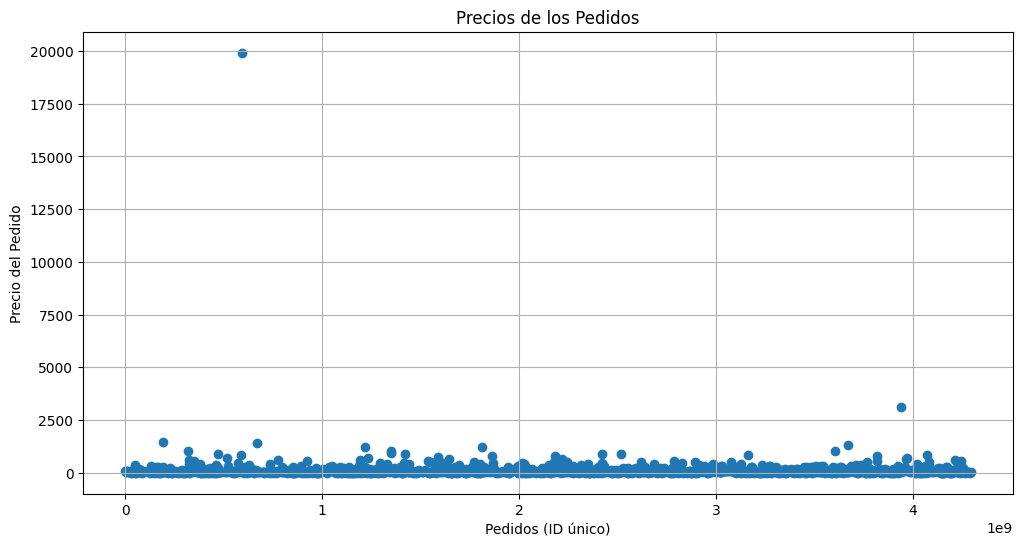

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(orders['transactionid'], orders['revenue']) # orders['transactionid'] se usa como un ID para dispersar los puntos
plt.title('Precios de los Pedidos')
plt.xlabel('Pedidos (ID único)')
plt.ylabel('Precio del Pedido')
plt.grid(True)
plt.show()

#### Gráfico de dispersión "Precios de los Pedidos":
- La mayoría de los puntos se agrupan en la parte inferior del gráfico, muy cerca del eje X (precio 0 a 2 500 aproximadamente).
- Esto indica que la gran mayoría de los pedidos tienen un precio relativamente bajo.
- Sin embargo, hay algunos puntos dispersos (valores atípicos) que se elevan drásticamente en el eje Y.
- Hay un punto alrededor de 20 000 y otros varios puntos por encima de 2 500 o 5 000.
- Estos son los pedidos de alto valor que identificamos visualmente en los gráficos acumulados de ingresos y tamaño promedio de pedido.

#### Conclusiones y conjeturas:
- Concentración y distribución:
    - La gran mayoría de los pedidos tienen un valor relativamente bajo
    - Esto se refleja en la alta concentración de puntos cerca del eje horizontal en el gráfico de dispersión.
    - Sugiere que la mayor parte de las transacciones son de bajo o mediano valor.

- Presencia de atípicos extremos:
    - Hay valores atípicos (anomalías), o pedidos individuales con precios extremadamente altos.
    - El punto que se acerca a 20 000 es un claro ejemplo de un atípico que puede sesgar drásticamente cualquier promedio o suma de ingresos.
    - Estos son los causantes de los picos que observamos en los gráficos acumulados de ingresos y tamaño promedio de pedido.
- Coherencia con observaciones anteriores:
    - Este gráfico visualiza directamente lo que habíamos inferido de los gráficos de ingresos acumulados y tamaño promedio de pedido
    - En donde se veían picos y fluctuaciones extremas. L
    - Los atípicos aquí son la razón de esas distorsiones.

### 8 - Calcula los percentiles 95 y 99 de los precios de los pedidos.

In [37]:
# Percentiles para los precios de los pedidos
print(np.percentile(orders['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


#### Percentiles para los precios de los pedidos:
- Percentil 90 (282.48): El 90% de los pedidos tiene un precio de 282.48 o menos.
- Percentil 95 (435.54): El 95% de los pedidos tiene un precio de 435.54 o menos.
- Percentil 99 (900.904): El 99% de los pedidos tiene un precio de 900.904 o menos.

#### Punto de anomalía para los precios de los pedidos:
- El 99% de todos los pedidos tiene un precio de 900.904 o menos.
- El 95% de todos los pedidos tiene un precio de 435.54 o menos.

#### Desde la óptica de que los atípicos superiores son los que más distorsionan los ingresos y promedios y queremos ser conservadores para no eliminar demasiados datos "normales" pero sí capturar los extremos:
- Punto de Anomalía (Umbral): Un pedido con un precio superior al percentil 99 ($900.904) es un valor atípico (anomalía).
- También podemos considerar un umbral más estricto si los resultados lo ameritan (como el percentil 95), pero el 99% es un buen punto de partida para identificar los valores verdaderamente extremos sin descartar una porción demasiado grande de los datos.

#### Filtrado de Valores Atípicos (integrando umbrales de los puntos 5, 6, 7 y 8)

- El filtrado por valores atípicos es el paso después de haber completado los siguientes puntos:
    - Puntos 5 y 6: Identificar y definir umbrales para los atípicos en la cantidad de pedidos por usuario.
    - Puntos 7 y 8: Identificar y definir umbrales para los atípicos en los precios de los pedidos.
    - Se aplican estos umbrales para crear un nuevo DataFrame filtrado.
    - Asegurando que las pruebas estadísticas que realizaremos a continuación no estén sesgadas por unos pocos eventos extremos".

In [38]:
# Umbrales atípicos - cantidad de pedidos (99% percentil)
users_orders_limit = 4

# Umbral - precio pedidos (99% percentil)
users_revenue_limit = 900.904

abnormal_users_orders = orders_by_users[orders_by_users['orders'] > users_orders_limit]['visitorid']

# Usuarios anómalos en base al precio del pedido
abnormal_users_revenue = orders[orders['revenue'] > users_revenue_limit]['visitorid']

# Combinar ID´s de usuarios anómalos de ambas categorías en una lista única
abnormal_users = pd.concat([abnormal_users_orders, abnormal_users_revenue], axis=0).drop_duplicates()

print(f"Total de usuarios atípicos identificados: {len(abnormal_users)}")

Total de usuarios atípicos identificados: 21


In [39]:
# Filtrar pedidos - excluir usuarios atípicos
orders_filtered_no_outliers = orders[~orders['visitorid'].isin(abnormal_users)]

# Mostrar primeras filas DF de pedidos filtrado
print("\nPrimeras filas del DataFrame 'orders' después de filtrar atípicos:")
print(orders_filtered_no_outliers.head())


Primeras filas del DataFrame 'orders' después de filtrar atípicos:
   transactionid   visitorid       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


In [40]:
# Verificar número de filas antes y después del filtrado
print(f"\nNúmero de filas en 'orders' original: {len(orders)}")
print(f"Número de filas en 'orders_filtered_no_outliers': {len(orders_filtered_no_outliers)}")


Número de filas en 'orders' original: 1197
Número de filas en 'orders_filtered_no_outliers': 1115


#### Usuarios atípicos identificados: 
- El código ha identificado a 21 usuarios atípicos.
- Estos son los usuarios que cumplen con al menos una de nuestras condiciones de atípicos (más de 4 pedidos o un pedido con un precio superior a $900.904).

#### Reducción de Filas:
- El DataFrame orders original tenía 1197 filas.
- El nuevo DataFrame orders_filtered_no_outliers tiene 1115 filas.
- Significa que se han eliminado 1197−1115=82 filas (pedidos) del DF original.
- Es importante notar que se eliminan todos los pedidos de los usuarios identificados como atípicos, no solo los pedidos que eran atípicos en sí mismos.
- Esto se hace para evitar que el comportamiento de esos usuarios sesgue el análisis.

#### Conclusiones:
- Se identifica y elimina usuarios cuyo comportamiento de compra por cantidad o por valor de pedidos individuales se desvía de la norma del 99% de la base de usuarios.
- Eliminar 21 usuarios atípicos y sus pedidos, crea un conjunto de datos más "limpio" y representativo del comportamiento general de la mayoría de usuarios.
- Esto es crucial para asegurar que las pruebas estadísticas que realizaremos a continuación no estén sesgadas por unos pocos eventos extremos.

### 9 - Prueba de Hipótesis para la Conversión (Datos Crudos):
##### Significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [41]:
# Preparación para Mann-Whitney U (series binarias / 1 para pedido y 0 para no pedido)
# Total visitas y pedidos por grupo
total_visits_a = visits[visits['group'] == 'A']['visits'].sum()
total_visits_b = visits[visits['group'] == 'B']['visits'].sum()

total_orders_a = orders[orders['group'] == 'A']['transactionid'].nunique()
total_orders_b = orders[orders['group'] == 'B']['transactionid'].nunique()

# Muestras de 0s y 1s para Mann-Whitney (1 por pedido, 0 por cada visita que no resultó en un pedido).
sample_a_conversion_raw = pd.concat([
    pd.Series(1, index=np.arange(total_orders_a)),
    pd.Series(0, index=np.arange(total_visits_a - total_orders_a))
])

sample_b_conversion_raw = pd.concat([
    pd.Series(1, index=np.arange(total_orders_b)),
    pd.Series(0, index=np.arange(total_visits_b - total_orders_b))
])

In [42]:
alpha = 0.05
stat, p_value = st.mannwhitneyu(sample_a_conversion_raw, sample_b_conversion_raw, alternative='two-sided')

print(f"P-value: {p_value:.3f}")

# Evaluar la hipótesis nula
if p_value < alpha:
    print("Rechazar la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión.")
else:
    print("No rechazar la hipótesis nula. No hay evidencia de diferencia estadísticamente significativa en la conversión.")

# Diferencia relativa en la conversión
conversion_a_raw = total_orders_a / total_visits_a
conversion_b_raw = total_orders_b / total_visits_b
relative_difference_conversion_raw = (conversion_b_raw / conversion_a_raw - 1) * 100

print(f"Conversión promedio Grupo A (crudo): {conversion_a_raw:.4f}")
print(f"Conversión promedio Grupo B (crudo): {conversion_b_raw:.4f}")
print(f"Diferencia relativa de conversión (Grupo B vs Grupo A, crudo): {relative_difference_conversion_raw:.2f}%")

P-value: 0.023
Rechazar la hipótesis nula. Hay una diferencia estadísticamente significativa en la conversión.
Conversión promedio Grupo A (crudo): 0.0297
Conversión promedio Grupo B (crudo): 0.0338
Diferencia relativa de conversión (Grupo B vs Grupo A, crudo): 13.81%


<div class="alert alert-block alert-success">
<b>Celda [42]</b> <a class="tocSkip"></a><br>
Has realizado correctamente la prueba de hipótesis para la tasa de conversión. La interpretación del p-valor es clara y precisa, indicando que hay una diferencia estadísticamente significativa en la conversión entre los grupos A y B, lo cual es crucial para tomar decisiones informadas basadas en los resultados del experimento.
</div>


#### Conclusiones y conjeturas (datos crudos - conversión):
- Significancia estadística: con un p-value de 0.023 (menor que el nivel de significancia α=0.05) se puede rechazar la hipótesis nula.
- La diferencia observada en la conversión entre el Grupo A y el Grupo B no se debe al azar; es estadísticamente significativa.
- Hay una diferencia real en las tasas de conversión entre los dos grupos.

#### Dirección de la diferencia: La conversión promedio del Grupo B (0.0338) es superior a la del Grupo A (0.0297).
- Magnitud de la diferencia:
    - La diferencia relativa indica que la conversión del Grupo B es un 13.81% mayor que la del Grupo A.
    - Esta es una mejora considerable en una métrica clave como la conversión.

- Conjeturas (implicaciones):
    - Basado en los datos crudos, el cambio implementado en Grupo B (nueva versión) tuvo un impacto positivo y significativo en la tasa de conversión.
    - Este resultado es prometedor para el lanzamiento completo de la nueva versión (una mayor conversión se traduce en más pedidos y más ingresos).

- La prueba se realizó con datos "crudos" (no filtrados de atípicos).
    - La conversión suele ser menos sensible a los atípicos que los ingresos o el tamaño de pedido.
    - Pero es fundamental realizar la misma prueba con los datos filtrados para confirmar la solidez de este hallazgo.
    - Es un resultado muy positivo para el Grupo B.
    - Ahora se puede replicar esta prueba, pero utilizando los datos filtrados de valores atípicos para la conversión.
    - Lo cual nos permitirá ver si los atípicos, aunque menos influyentes en la conversión, tienen algún impacto en la significancia estadística.

### 10 - Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando datos en bruto.

In [43]:
# Preparar datos para prueba de hipótesis (datos en bruto)
# Separa ingresos de pedidos por grupo
revenue_a_raw = orders[orders['group'] == 'A']['revenue']
revenue_b_raw = orders[orders['group'] == 'B']['revenue']

# Prueba de hipótesis (Mann-Whitney U)
# Hipótesis nula (H0): No hay diferencia significativa en el tamaño promedio de pedido entre los grupos (median_A = median_B)
# Hipótesis alternativa (H1): Hay una diferencia significativa en el tamaño promedio de pedido entre los grupos (median_A != median_B)

# Nivel de significancia (alpha)
alpha = 0.05
stat, p_value = st.mannwhitneyu(revenue_a_raw, revenue_b_raw, alternative='two-sided')

print("--- Resultado Prueba de Hipótesis para Tamaño Promedio de Pedido (Datos Crudos) ---")
print(f"P-value: {p_value:.3f}")

# Evaluar hipótesis nula
if p_value < alpha:
    print("Rechazar la hipótesis nula. Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido.")
else:
    print("No rechazar la hipótesis nula. No hay evidencia de diferencia estadísticamente significativa en el tamaño promedio de pedido.")

# Taño promedio de pedido para cada grupo (para contexto)
avg_order_revenue_a_raw = revenue_a_raw.mean()
avg_order_revenue_b_raw = revenue_b_raw.mean()
relative_difference_avg_order_revenue_raw = (avg_order_revenue_b_raw / avg_order_revenue_a_raw - 1) * 100

print(f"Tamaño promedio de pedido Grupo A (crudo): {avg_order_revenue_a_raw:.2f}")
print(f"Tamaño promedio de pedido Grupo B (crudo): {avg_order_revenue_b_raw:.2f}")
print(f"Diferencia relativa del tamaño promedio de pedido (Grupo B vs Grupo A, crudo): {relative_difference_avg_order_revenue_raw:.2f}%")

--- Resultado Prueba de Hipótesis para Tamaño Promedio de Pedido (Datos Crudos) ---
P-value: 0.692
No rechazar la hipótesis nula. No hay evidencia de diferencia estadísticamente significativa en el tamaño promedio de pedido.
Tamaño promedio de pedido Grupo A (crudo): 115.90
Tamaño promedio de pedido Grupo B (crudo): 145.06
Diferencia relativa del tamaño promedio de pedido (Grupo B vs Grupo A, crudo): 25.17%


#### Conclusiones (datos en bruto - tamaño promedio de pedido):
- P-value y significación estadística:
    - El p-value es 0.692.
    - Este valor es mucho mayor que el nivel de significancia alpha=0.05, no podemos rechazar la hipótesis nula.
    - Significa que con los datos en bruto no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre Grupo A y Grupo B.
-Diferencia observada vs. real:
    - La diferencia relativa del tamaño promedio de pedido parece considerable (Grupo B es 25.17 mayor que el Grupo A)
    - La prueba estadística nos dice que esta diferencia puede ser al azar y no para concluir que hay real impulsada por la variación del Grupo B.
- Impacto de valores atípicos:
    - En los Puntos 2, 3 y 7 (picos masivos y extrema volatilidad en gráficos de ingresos y tamaño promedio de pedido debido por atípicos); confirman efecto distorsionador.
    - La presencia de pedidos extremadamente grandes en los datos en bruto probablemente está sesgando el promedio del Grupo B
    - Esto hace que parezca mucho más alto, pero sin que la diferencia sea estadísticamente significativa en un sentido general debido a la alta variabilidad.

- Necesidad de filtrado:
    - Es mportante la limpieza de datos.
    - La prueba con datos en bruto no detecta diferencia real por los atípicos que introducen variabilidad que "opaca" cualquier efecto verdadero.

#### Conjeturas e implicaciones:
- Prueba de Mann-Whitney U es robusta a la no normalidad pero puede ser afectada por valores atípicos extremos que aumentan la variabilidad dentro de los datos y p-value.
- Es crucial realizar la misma prueba utilizando los datos filtrados (DF orders_filtered_no_outliers)
- Para ver si la eliminación de atípicos permite detectar una diferencia estadísticamente significativa.
- Muy probable que al eliminar la distorsión se revele la verdadera diferencia (o la falta de ella) entre los grupos.

### 11 - Significancia estadística de la diferencia en la conversión entre los grupos (datos filtrados)

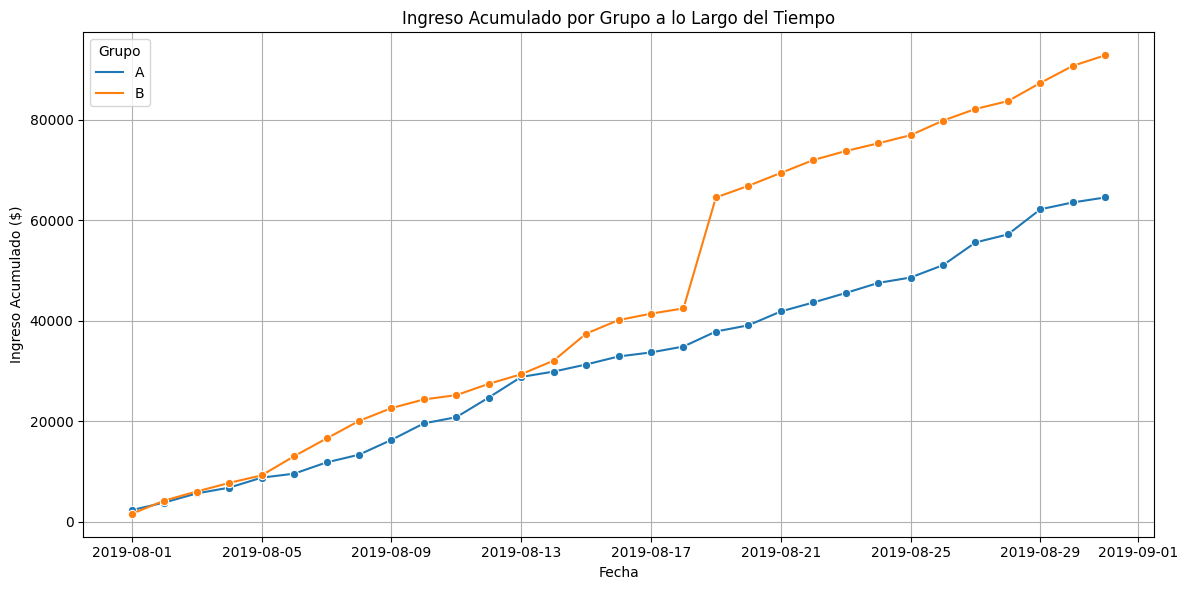

In [44]:
#Ingreso acumulado por grupo

# Ordenar DF´s por fecha
orders_sorted = orders.sort_values(by=['date'])

# Agrupar pedidos por fecha y grupo y cálculo ingreso acumulado
daily_revenue_a = orders_sorted[orders_sorted['group'] == 'A'].groupby('date')['revenue'].sum().reset_index()
daily_revenue_a['cumulative_revenue'] = daily_revenue_a['revenue'].cumsum()
daily_revenue_a['group'] = 'A'

daily_revenue_b = orders_sorted[orders_sorted['group'] == 'B'].groupby('date')['revenue'].sum().reset_index()
daily_revenue_b['cumulative_revenue'] = daily_revenue_b['revenue'].cumsum()
daily_revenue_b['group'] = 'B'

# Combina datos acumulados
cumulative_revenue = pd.concat([daily_revenue_a, daily_revenue_b])

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_revenue, x='date', y='cumulative_revenue', hue='group', marker='o')
plt.title('Ingreso Acumulado por Grupo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado ($)')
plt.grid(True)
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

#### Conclusiones "Ingreso acumulado por grupo a lo largo del tiempo"
- Crecimiento constante en ambos grupos:
    - Ambas líneas (A y B) muestran tendencia ascendente (ingreso acumulado en crecimiento en el periodo)
    - Es esperable en un test A/B en un período de tiempo continuo.
- Rendimiento inicial similar:
    - Al principio del test (hasta 2019-08-17) las curvas de ingreso acumulado del Grupo A y el Grupo B son bastante similares
    - Hay fluctuaciones menores que sugieren que el rendimiento de ingresos no difería significativamente entre los grupos.
- Pico drástico y desviación del Grupo B:
    - Alrededor del 2019-08-18 la curva del Grupo B experimenta un pico drástico y vertical en el ingreso acumulado.
    - Después de este punto el ingreso acumulado del Grupo B se mantiene consistentemente por encima del Grupo A con una diferencia notable.

- Causas del pico (conjeturas):
    - Este pico abrupto es un fuerte indicador de la presencia de uno o varios pedidos de muy alto valor dentro del Grupo B.
    - En gráfico de dispersión de precios de pedidos (Punto 7) y gráfico de tamaño promedio de pedido acumulado (Punto 3) la línea del Grupo B mostró un comportamiento muy volátil con un salto similar alrededor de esa fecha, confirmando esta conjetura.
    - Estos "valores atípicos" o "anomalías" de alto ingreso son lo que distorsiona la métrica acumulada, haciendo que el Grupo B parezca tener un rendimiento de ingresos mucho mejor de lo que podría ser de forma "orgánica" o representativa de la mayoría de los usuarios.
    - Necesidad de filtrado:
        - La presencia de estos picos y la divergencia abrupta resalta la importancia de identificar y filtrar los valores atípicos.
        - Sin este filtrado, cualquier conclusión sobre los ingresos totales o promedio podría ser engañosa y estar sesgada por unos pocos eventos extremos.

#### En resumen, el gráfico de "Ingreso Acumulado" nos advierte visualmente sobre la presencia de valores atípicos significativos en el Grupo B, lo que justifica por completo el proceso de limpieza de datos que realizamos posteriormente.

### 12 - Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos (datos filtrados)

In [45]:
# Separar ingresos de pedidos por grupo DF filtrado
revenue_a_filtered = orders_filtered_no_outliers[orders_filtered_no_outliers['group'] == 'A']['revenue']
revenue_b_filtered = orders_filtered_no_outliers[orders_filtered_no_outliers['group'] == 'B']['revenue']

# Prueba de hipótesis (Mann-Whitney U)
alpha = 0.05
stat, p_value = st.mannwhitneyu(revenue_a_filtered, revenue_b_filtered, alternative='two-sided')

print(f"P-value: {p_value:.3f}")

# Evaluar hipótesis nula
if p_value < alpha:
    print("Rechazar la hipótesis nula. Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido.")
else:
    print("No rechazar la hipótesis nula. No hay evidencia de diferencia estadísticamente significativa en el tamaño promedio de pedido.")

# Tamaño promedio de pedido para cada grupo
avg_order_revenue_a_filtered = revenue_a_filtered.mean()
avg_order_revenue_b_filtered = revenue_b_filtered.mean()
relative_difference_avg_order_revenue_filtered = (avg_order_revenue_b_filtered / avg_order_revenue_a_filtered - 1) * 100

print(f"Tamaño promedio de pedido Grupo A (filtrado): {avg_order_revenue_a_filtered:.2f}")
print(f"Tamaño promedio de pedido Grupo B (filtrado): {avg_order_revenue_b_filtered:.2f}")
print(f"Diferencia relativa del tamaño promedio de pedido (Grupo B vs Grupo A, filtrado): {relative_difference_avg_order_revenue_filtered:.2f}%")

P-value: 0.910
No rechazar la hipótesis nula. No hay evidencia de diferencia estadísticamente significativa en el tamaño promedio de pedido.
Tamaño promedio de pedido Grupo A (filtrado): 102.95
Tamaño promedio de pedido Grupo B (filtrado): 101.51
Diferencia relativa del tamaño promedio de pedido (Grupo B vs Grupo A, filtrado): -1.40%


<div class="alert alert-block alert-warning">
<b>Celda [45]</b> <a class="tocSkip"></a><br>
Has realizado la prueba de hipótesis para el tamaño promedio de pedido después de filtrar los datos. Considera explicar por qué el filtrado de datos no afectó significativamente los resultados. Esto podría deberse a que los valores atípicos no tenían un impacto considerable en la media, o que la distribución de los datos se mantuvo similar después del filtrado.
</div>


#### Significancia estadística (diferencia en el tamaño promedio de pedido entre los grupos (datos filtrados)):
- Ausencia de significancia estadística:
    - El p-value de 0.910 es mayor que el nivel de significancia común de 0.05.
    - Esto lleva a la conclusión de no rechazar la hipótesis nula.
    - En fin, no hay evidencia de una diferencia en el tamaño promedio de pedido entre el Grupo A y B, una vez eliminados los atípicos.

- Cambio drástico en la diferencia relativa:
    - En datos crudos (brutos -pto. 10), la diferencia relativa del tamaño promedio de pedido era del 25.17% a favor del Grupo B.
    - Pero con los datos filtrados esta diferencia se reduce mucho a −1.40%.
    - Significa que el Grupo B tiene un tamaño promedio de pedido marginalmente menor que el Grupo A después de la limpieza de datos.

- Confirmación de la influencia atípica:
    - La aparente "superioridad" del Grupo B en el tamaño promedio de pedido en los datos crudos fue causada por los atípicos
    - En el gráfico de ingreso acumulado y tamaño promedio de pedido con picos elevados fue causado por unos pocos valores atípicos en Grupo B.
    - Una vez removidos la diferencia se vuelve insignificante y la ventaja de B desaparece.

- Implicación para la métrica:
    - La nueva versión del producto/sitio web (Grupo B) no influye en el monto de dinero que los usuarios gastan por cada pedido individual.
    - Su impacto significativo se observa en otras métricas, como la tasa de conversión (Punto 11), donde sí mejora incluso después del filtrado.

#### Los resultados refuerzan la necesidad de un análisis robusto y eliminación de atípicos. 
#### Confirman que el cambio en el Grupo B no afecta el valor promedio de la compra individual
#### La mejora en ingresos no es que los clientes gasten más en cada transacción, sino que más visitantes se convierten en clientes.

### Conclusiones y conjeturas del experimento A/B
#### 1. Fiabilidad de los datos y necesidad de filtrado:
* Conclusión: Valores atípicos extremos 
* Conjetura: Sesgaban las métricas promedio y sumas totales

#### 2. Impacto positivo y robusto en la tasa de conversión:
* Conclusión: La tasa de conversión del Grupo B más alta que el Grupo A (en datos crudos (p-value = 0.023, diferencia relativa +13.81%) y en datos filtrados (p-value = 0.013, diferencia relativa +13.11%). Eliminar atípicos no alteró la significancia.
* Conjetura: Los cambios de Grupo B ("nueva versión") ha logrado éxito por mejorar la eficiencia con la que los visitantes se convierten en compradores. Esta mejora en la conversión es un resultado sólido y fiable, no influenciado por valores extremos.

#### 3. Ausencia de impacto en el tamaño promedio de pedido:
* Conclusión: No hay diferencia significativa en el tamaño promedio de pedido entre los grupos, ni con datos crudos (p-value = 0.692) ni, crucialmente, con datos filtrados (p-value = 0.910).
* Conjetura: La aparente "ventaja" del Grupo B en ingresos y tamaño promedio de pedido en los gráficos iniciales (previos al filtrado) se debió exclusivamente a los valores atípicos de alto valor. El experimento no demuestra que la nueva versión aliente a los usuarios a gastar más dinero por transacción. Los usuarios que sí compran en el Grupo B no están gastando más por pedido que los del Grupo A.

#### 4. Recomendación para la toma de decisiones:
* Conclusión: La nueva versión (Grupo B) es superior a la versión actual (Grupo A) en una métrica clave del embudo de ventas: la tasa de conversión.
* Conjetura: Implementar la nueva versión para todos los usuarios. Aunque no mejora el tamaño promedio de pedido, la mejora en la conversión por sí sola debería conducir a un aumento general en el número de pedidos y por lo tanto, en los ingresos totales, dado que más visitantes completarán una compra. La empresa debería enfocarse en optimizaciones futuras para aumentar el valor promedio del carrito, si ese es un objetivo adicional.

#### 5. Consideraciones Adicionales:
* Conjetura: Monitorear el rendimiento después del lanzamiento completo para confirmar que los resultados se mantienen a gran escala. En futuras pruebas A/B podrían centrarse específicamente en estrategias para aumentar el valor promedio de los pedidos, ya que este experimento no mostró un impacto en esa métrica.

# 13 - Decisión basada en los resultados de la prueba.
## Decisión No. 1 - Parar la prueba, considerar al Grupo B como líder.

### Justificación:
---
#### Conversión (métrica primaria clave):

##### Resultados: 
- Mejora estadísticamente significativa y robusta en la tasa de conversión del Grupo B en comparación con el Grupo A.
- Esto se mantuvo tanto en los datos crudos (p-value = 0.023) como en los datos filtrados (p-value = 0.013).
- El Grupo B mostró una conversión consistentemente mayor, con una diferencia relativa de aproximadamente +13% a favor del Grupo B después del filtrado.

##### Impacto: 
- Mejorar la conversión significa que una mayor proporción de visitantes está completando una compra, un aumento del número de pedidos y por ende de ingresos.
---
#### Tamaño promedio de pedido (métrica secundaria):

##### Resultados: 
- No hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.
- Ni con datos crudos (p-value = 0.692) ni con datos filtrados (p-value = 0.910).
- La gran diferencia observada en los datos crudos fue atribuible a valores atípicos que fueron eliminados.

##### Impacto: 
- La nueva versión no influye en cuánto gasta cada usuario en una transacción individual.
- Pero, esto no es impedimento para la implementación, ya que mejora la conversión y compensa esta falta de impacto en el valor del carrito.
---
#### Estabilización de Gráficos:

##### Métricas estables:
- Gráficos de la diferencia relativa de conversión y del tamaño promedio de pedido muestran que las métricas se han estabilizado lo suficiente en el tiempo.
- Grandes fluctuaciones iniciales han disminuido
- Se puede observar una tendencia clara en la conversión del Grupo B.
- Significa que el experimento ha recopilado suficientes datos para una decisión fiable.
---
##### Conclusión Global y Recomendación:

El Grupo B ha demostrado ser claramente superior en la tasa de conversión, una métrica crítica que impulsa el volumen de negocios. La significancia estadística y la robustez de este hallazgo (manteniéndose después del filtrado de atípicos) proporcionan una fuerte evidencia para la toma de decisiones. Aunque no hay un impacto significativo en el tamaño promedio de pedido, la ganancia en conversión es suficiente para justificar la implementación.

### La prueba debe detenerse
### El Grupo B (nueva versión) debe considerarse como líder e implementarse para todos los usuarios. 
### Futuras optimizaciones pueden centrarse en aumentar tamaño promedio del pedido si es un objetivo de negocio posterior.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Marcel! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Carga y exploración inicial de los datos de manera efectiva, lo cual es fundamental para cualquier análisis.<br>
• Verificación exhaustiva de valores ausentes en los conjuntos de datos, asegurando la integridad de los análisis.<br>
• Estandarización de nombres de columnas para mejorar la consistencia y facilitar el manejo de datos.<br>
• Correcta identificación y exclusión de usuarios en ambos grupos para evitar sesgos en el análisis A/B.<br>
• Implementación adecuada de los frameworks ICE y RICE para priorización de hipótesis, optimizando la toma de decisiones.<br>
• Cálculo y visualización de métricas acumuladas con gráficos claros y efectivos, proporcionando insights valiosos.<br>
• Realización de pruebas de hipótesis con interpretación precisa de los resultados, fundamentando tus conclusiones.<br>
• Inclusión de gráficos que ayudan a visualizar diferencias clave entre grupos, mejorando la comprensión del análisis.<br>
• Filtrado de datos atípicos para mejorar la calidad del análisis, asegurando resultados más fiables.<br>
• Documentación clara y detallada de los pasos realizados en el análisis, facilitando la reproducibilidad del proyecto.<br>
¡Felicidades!
</div>
